<a href="https://colab.research.google.com/github/zo-chu/fastAIwhatIsUp/blob/master/first_ever_Fast_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ok, so this lines are so all reloads ok

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

this are some important imports

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate
bs = 64 # can be less if not enough memory

created a dataset using google photos and this tutorial https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb


In [4]:
# file = 'brow_piercing.csv'
path1 = Path('/content/drive/My Drive/datasetsForFastAIExp/brow_piercing.csv')
path2 = Path('/content/drive/My Drive/datasetsForFastAIExp/septum_piercing.csv')

pathToDest = Path('data/piercing')
classes = ['brow','septum']

folder1 = 'brow'
folder2 = 'septum'
dest1 = pathToDest/folder1
dest2 = pathToDest/folder2

dest1.mkdir(parents=True, exist_ok=True)
dest2.mkdir(parents=True, exist_ok=True)

download_images(path1, dest1, max_pics=200)
download_images(path2, dest2, max_pics=200)

# dest1.ls()



now I want to clean data

In [5]:
for c in classes:
    print(c)
    verify_images(pathToDest/c, delete=True, max_size=500)

brow


septum


In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(pathToDest, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

data.classes


['brow', 'septum']

now to see some


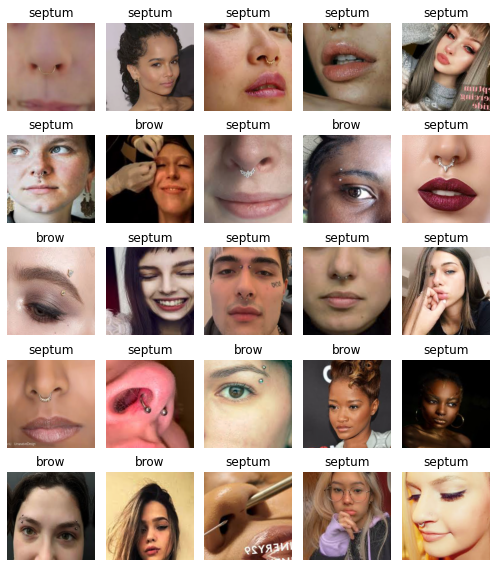

In [11]:
data.show_batch(rows=3, figsize=(7,8))


In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['brow', 'septum'], 2, 87, 21)

ok, this sorta works , now let's train!


In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [12]:
learn.model
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,0.559794,1.098480,0.476190,00:02
1,0.567555,0.958231,0.285714,00:01
2,0.495119,1.021940,0.285714,00:02
3,0.498831,1.038764,0.333333,00:01


to save this odd results


In [ ]:
learn.save('stage-1')